In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [7]:
import io

In [8]:
sample_df = pd.read_csv(io.StringIO(uploaded['Social_Network_Ads.csv'].decode('utf-8')))

In [9]:
sample_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
new_dataset = sample_df.drop(columns=['User ID'])

In [13]:
new_dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
new_dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

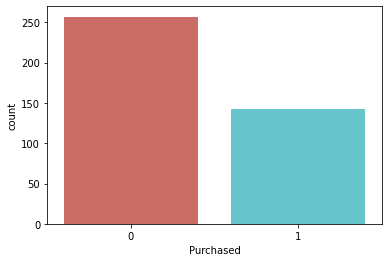

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [31]:
sns.countplot(x = 'Purchased', data = new_dataset, palette = 'hls')
plt.show()
new_dataset['Gender'].replace('Female',0,inplace=True)
new_dataset['Gender'].replace('Male',1,inplace=True)
new_dataset.head()

In [53]:
X = new_dataset[['Gender','Age','EstimatedSalary']]
print(X)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


In [57]:
Y = new_dataset[['Purchased']]
print(Y)
Y.Purchased.value_counts()

     Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


0    257
1    143
Name: Purchased, dtype: int64

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10,random_state=0)
print(Y_train)

     Purchased
100          0
322          0
6            0
1            0
297          1
..         ...
323          1
192          0
117          0
47           0
172          0

[360 rows x 1 columns]


In [59]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred=logreg.predict(X_test)

In [61]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[32,  0],
       [ 8,  0]])

In [62]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
y_pred1= logreg.predict([[0,32,150000]])

In [64]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
